# English Wikipedia page views, 2008 - 2017

For this assignment, your job is to analyze traffic on English Wikipedia over time, and then document your process and the resulting dataset and visualization according to best practices for open research that were outlined for you in class.

## PageView API 

### Here, I have queried the APIs multiple times and also converted the results into a dataframe of the required format. 

We don't have mobile site date between 2008 and 2014 for pageCounts.


In [1]:
import requests
import pandas

endpoint = 'https://wikimedia.org/api/rest_v1/metrics/pageviews/aggregate/{project}/{access}/{agent}/{granularity}/{start}/{end}'

headers={'User-Agent' : 'https://github.com/r1rajiv92', 'From' : 'rajiv92@uw.edu'}

yearMonthCombinations = { '2015' : [ 7, 8, 9, 10, 11, 12],
                          '2016' : [ 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                          '2017' : [ 1, 2, 3, 4, 5, 6, 7, 8, 9] }

for accessType in  [ 'desktop', 'mobile-web', 'mobile-app' ]:
    for year in range(2015, 2018):
        for month in yearMonthCombinations[str(year)]:
        
            if int(month / 10) == 0:
                startMonth = ''.join( [ '0', str(month) ] )
                startParam = ''.join([ str(year), startMonth, '0100' ])
                if int((month+1) / 10) == 0:
                    endParam = ''.join([ str(year), '0', str(month+1), '0100' ])
                else:
                    endParam = ''.join([ str(year), str(month+1), '0100' ])
            else:
                startMonth = str(month)
                startParam = ''.join([ str(year), startMonth, '0100' ])
                endParam = ''.join([ str(year), str(month+1), '0100' ])
                if month + 1 == 13:
                    endParam = ''.join( [str(year+1), '01', '0100'])

            params = {'project' : 'en.wikipedia.org',
                    'access' : accessType,
                    'agent' : 'user',
                    'granularity' : 'monthly',
                    'start' : startParam,
                    'end' : endParam
                    }
            api_call = requests.get(endpoint.format(**params))
            response = api_call.json()
        
            for result in response['items']:
                result['year'] = str(year)
                result['month'] = startMonth
        
            if 'PageViewDataFrame' in locals():
                PageViewDataFrame = pandas.concat([ PageViewDataFrame, pandas.DataFrame.from_dict(response['items']) ])
            else:
                PageViewDataFrame = pandas.DataFrame.from_dict(response['items'])


## PageCount API 

### Here, I have queried the APIs multiple times and also converted the results into a dataframe of the required format. 



In [2]:
endpoint = 'https://wikimedia.org/api/rest_v1/metrics/legacy/pagecounts/aggregate/{project}/{access-site}/{granularity}/{start}/{end}'

headers={'User-Agent' : 'https://github.com/r1rajiv92', 'From' : 'rajiv92@uw.edu'}

yearMonthCombinations = { '2008' : [ 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                          '2009' : [ 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                          '2010' : [ 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                          '2011' : [ 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                          '2012' : [ 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                          '2013' : [ 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                          '2014' : [ 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                          '2015' : [ 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                          '2016' : [ 1, 2, 3, 4, 5, 6, 7]
                          }

for accessType in  [ 'desktop-site', 'mobile-site' ]:
    for year in range(2008, 2017):
        for month in yearMonthCombinations[str(year)]:
        
            if int(month / 10) == 0:
                startMonth = ''.join( [ '0', str(month) ] )
                startParam = ''.join([ str(year), startMonth, '0100' ])
                if int((month+1) / 10) == 0:
                    endParam = ''.join([ str(year), '0', str(month+1), '0100' ])
                else:
                    endParam = ''.join([ str(year), str(month+1), '0100' ])
            else:
                startMonth = str(month)
                startParam = ''.join([ str(year), startMonth, '0100' ])
                endParam = ''.join([ str(year), str(month+1), '0100' ])
                if month + 1 == 13:
                    endParam = ''.join( [str(year+1), '01', '0100'])

            params = {'project' : 'en.wikipedia.org',
                    'access-site' : accessType,
                    'granularity' : 'monthly',
                    'start' : startParam,
                    'end' : endParam
                    }
            api_call = requests.get(endpoint.format(**params))
            response = api_call.json()
            if 'items' in response.keys():
                for result in response['items']:
                    result['year'] = str(year)
                    result['month'] = startMonth
            else:
                print('Page Count Data Missing for', accessType, 'on', month, year )
                continue
                
            if 'PageCountDataFrame' in locals():
                PageCountDataFrame = pandas.concat([ PageCountDataFrame, pandas.DataFrame.from_dict(response['items']) ])
            else:
                PageCountDataFrame = pandas.DataFrame.from_dict(response['items'])



Page Count Data Missing for mobile-site on 1 2008
Page Count Data Missing for mobile-site on 2 2008
Page Count Data Missing for mobile-site on 3 2008
Page Count Data Missing for mobile-site on 4 2008
Page Count Data Missing for mobile-site on 5 2008
Page Count Data Missing for mobile-site on 6 2008
Page Count Data Missing for mobile-site on 7 2008
Page Count Data Missing for mobile-site on 8 2008
Page Count Data Missing for mobile-site on 9 2008
Page Count Data Missing for mobile-site on 10 2008
Page Count Data Missing for mobile-site on 11 2008
Page Count Data Missing for mobile-site on 12 2008
Page Count Data Missing for mobile-site on 1 2009
Page Count Data Missing for mobile-site on 2 2009
Page Count Data Missing for mobile-site on 3 2009
Page Count Data Missing for mobile-site on 4 2009
Page Count Data Missing for mobile-site on 5 2009
Page Count Data Missing for mobile-site on 6 2009
Page Count Data Missing for mobile-site on 7 2009
Page Count Data Missing for mobile-site on 8 20

##### Summing up accross mobile-app and mobile-site for PageViews into a single access type called 'mobile'. Also, grouping by year, month and accessTypes to get the results

In [3]:
PageViewDataFrame.loc[PageViewDataFrame.access != 'desktop', 'access'] = 'mobile'

PageCountDataFrame['access'] = "desktop"
PageCountDataFrame.loc[PageCountDataFrame['access-site'] != 'desktop-site', 'access'] = 'mobile'

pageCounts = pandas.DataFrame( PageCountDataFrame.groupby(['year', 'month', 'access'])['count'].sum().reset_index() )
pageViews = pandas.DataFrame( PageViewDataFrame.groupby(['year', 'month', 'access'])['views'].sum().reset_index() )

### Generating the final CSV Data frame used for visualization!!

In [4]:
finalCSVDataFrame = pandas.DataFrame( columns = ['year', 'month', 'pagecount_all_views', 'pagecount_desktop_views', 'pagecount_mobile_views',
                                                 'pageview_all_views', 'pageview_desktop_views', 'pageview_mobile_views' ] )
for year in range( 2008, 2018):
    for month in range(1,13):
        if year == 2017 and month > 9:
            continue
        else:
            if month < 9:
                monthString = ''.join(['0', str(month)])
                
            pagecount_desktop_views = pageCounts[(pageCounts['year'] == str(year)) & (pageCounts['month'] == monthString) 
                                                                                 & (pageCounts['access'] == 'desktop' )]
            
            if len(pagecount_desktop_views) != 0:
                pagecount_desktop_views = int(pagecount_desktop_views['count'])
            else:
                pagecount_desktop_views = 0
                
            pagecount_mobile_views = pageCounts[(pageCounts['year'] == str(year)) & (pageCounts['month'] == monthString) 
                                                                                 & (pageCounts['access'] == 'mobile' )]
            
            if len(pagecount_mobile_views) != 0:
                pagecount_mobile_views = int(pagecount_mobile_views['count'])
            else:
                pagecount_mobile_views = 0
                
            pagecount_all_views = pagecount_desktop_views + pagecount_mobile_views
            
            pageview_desktop_views = pageViews[(pageViews['year'] == str(year)) & (pageViews['month'] == monthString) 
                                                                                 & (pageViews['access'] == 'desktop' )]
            
            if len(pageview_desktop_views) != 0:
                pageview_desktop_views = int(pageview_desktop_views['views'])
            else:
                pageview_desktop_views = 0
            
            pageview_mobile_views = pageViews[(pageViews['year'] == str(year)) & (pageViews['month'] == monthString) 
                                                                                 & (pageViews['access'] == 'mobile' )]
            
            if len(pageview_mobile_views) != 0:
                pageview_mobile_views = int(pageview_mobile_views['views'])
            else:
                pageview_mobile_views = 0
            
            pageview_all_views = pageview_desktop_views + pageview_mobile_views
            
            finalCSVDataFrame = finalCSVDataFrame.append( {'year': int(year), 
                           'month': int(month), 
                           'pagecount_all_views': int(pagecount_all_views),
                           'pagecount_desktop_views': int(pagecount_desktop_views),
                           'pagecount_mobile_views': int(pagecount_mobile_views),
                           'pageview_all_views': int(pageview_all_views),
                           'pageview_desktop_views': int(pageview_desktop_views),
                           'pageview_mobile_views': int(pageview_mobile_views)
                           }, ignore_index=True )
        
            

In [5]:
finalCSVDataFrame

,year,month,pagecount_all_views,pagecount_desktop_views,pagecount_mobile_views,pageview_all_views,pageview_desktop_views,pageview_mobile_views
0,2008.0,1.0,4.930903e+09,4.930903e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,2008.0,2.0,4.818394e+09,4.818394e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,2008.0,3.0,4.955406e+09,4.955406e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
3,2008.0,4.0,5.159162e+09,5.159162e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
4,2008.0,5.0,5.584691e+09,5.584691e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
5,2008.0,6.0,5.712104e+09,5.712104e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
6,2008.0,7.0,5.306303e+09,5.306303e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
7,2008.0,8.0,5.140156e+09,5.140156e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
8,2008.0,9.0,5.140156e+09,5.140156e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
9,2008.0,10.0,5.140156e+09,5.140156e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [12]:
finalCSVDataFrame.to_csv('finalCSV.csv')

#### Plotting the time series Visualization

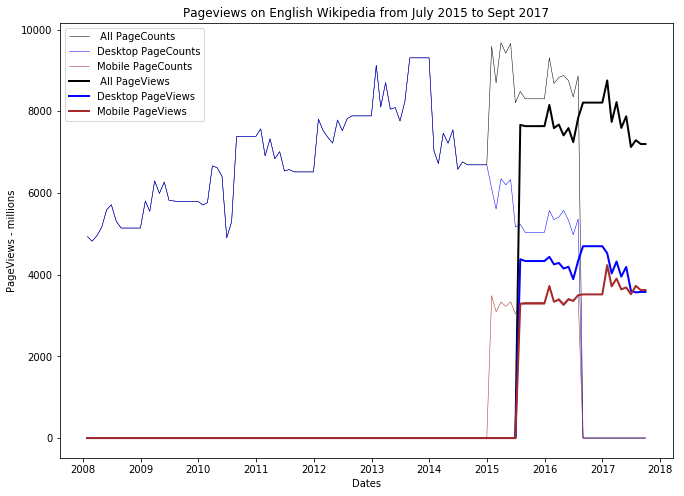

In [7]:
import matplotlib.pyplot as plt

dates = pandas.date_range('2008-01', '2017-10',freq='M')

plt.plot(dates, finalCSVDataFrame["pagecount_all_views"]/1000000, label = " All PageCounts", 
         color = "black", linewidth = 0.5)
plt.plot(dates, finalCSVDataFrame["pagecount_desktop_views"]/1000000, label = "Desktop PageCounts", 
         color = "blue", linewidth = 0.5)
plt.plot(dates, finalCSVDataFrame["pagecount_mobile_views"]/1000000, label = "Mobile PageCounts", 
         color = "brown", linewidth = 0.5)
plt.plot(dates, finalCSVDataFrame["pageview_all_views"]/1000000, label = " All PageViews", 
         color = "black", linewidth = 2)
plt.plot(dates, finalCSVDataFrame["pageview_desktop_views"]/1000000, label = "Desktop PageViews", 
         color = "blue", linewidth = 2)
plt.plot(dates, finalCSVDataFrame["pageview_mobile_views"]/1000000, label = "Mobile PageViews", 
         color = "brown", linewidth = 2)

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 10

plt.xlabel("Dates")
plt.ylabel("PageViews - millions")
plt.title("Pageviews on English Wikipedia from July 2015 to Sept 2017")
plt.legend(loc=2)
plt.show()
